In [33]:
import pandas as pd
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import random

In [34]:
df = pd.read_csv('Mall_Customers.csv')

In [35]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [36]:
df.drop(['CustomerID','Gender','Age'],axis=1,inplace=True)

In [37]:
df.dtypes

Annual Income (k$)        int64
Spending Score (1-100)    int64
dtype: object

In [38]:
df.isnull().sum()

Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Text(0, 0.5, 'Spending Score')

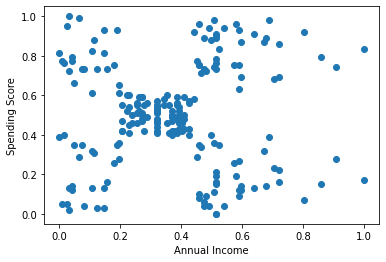

In [49]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

In [40]:
scaler = MinMaxScaler()
df['Annual Income (k$)'] = scaler.fit_transform(df[['Annual Income (k$)']])
df['Spending Score (1-100)'] = scaler.fit_transform(df[['Spending Score (1-100)']])

In [41]:
no_of_class = 5
km = KMeans(n_clusters=no_of_class)
y_predicted = km.fit_predict(df[['Annual Income (k$)','Spending Score (1-100)']])

In [42]:
df['class'] = y_predicted
df

,Annual Income (k$),Spending Score (1-100),class
0,0.000000,0.387755,4
1,0.000000,0.816327,1
2,0.008197,0.051020,4
3,0.008197,0.775510,1
4,0.016393,0.397959,4
...,...,...,...
195,0.860656,0.795918,3
196,0.909836,0.275510,2
197,0.909836,0.744898,3
198,1.000000,0.173469,2


In [43]:
km.cluster_centers_

array([[0.33029751, 0.49508692],
       [0.08792846, 0.79962894],
       [0.6       , 0.16443149],
       [0.58638083, 0.82783883],
       [0.09265859, 0.20319432]])

In [44]:
km.inertia_

3.583117905952559

In [45]:
def plot(df,max_range):
    sub_df = {}
    colors = ['Yellow','Blue','Red','Green','Black','Brown','Pink']
    for i in range(max_range):
        sub_df[i] = df[df['class'] == i]
        plt.scatter(sub_df[i]['Annual Income (k$)'],sub_df[i]['Spending Score (1-100)'],color=colors[i])

    plt.xlabel('Annual Income')
    plt.ylabel('Spending Score')

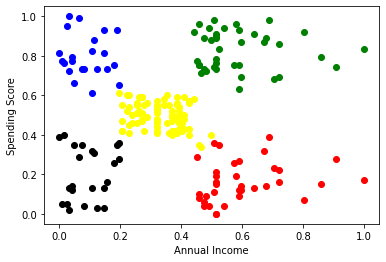

In [46]:
plot(df,no_of_class)

In [47]:
k_range = range(1,10)
sse = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit_predict(df[['Annual Income (k$)','Spending Score (1-100)']])
    sse.append(km.inertia_)

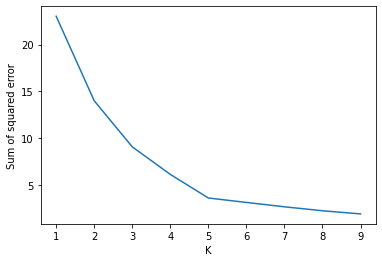

In [48]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_range,sse)